<a href="https://colab.research.google.com/github/moridin04/CCADMACL-Research/blob/main/PCA_CCFD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Principal Component Analysis

In [91]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.decomposition import PCA

## Step 1: Load the dataset

In [92]:
cfd = pd.read_csv('creditcard.csv')

X = cfd.drop('Class', axis=1)
y = cfd['Class']

feature_names = X.columns

This dataset is made of 30 features/dimensions: Time, V1-V28, Amount

In [93]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [94]:
print("Missing values in each column:")
print(X.isnull().sum())

Missing values in each column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64


## Step 2: Use PCA to for reduce the dimensions

In [95]:
X.shape

(284807, 30)

This shows that we have 284,807 transactions and 30 features (Time, V1, V2, ... V28, Amount)


In [96]:
scaler = StandardScaler()
X_scaled = StandardScaler().fit_transform(X)  # Scale the data

pca = PCA(n_components=10)
X_principal = pca.fit_transform(X_scaled)

Here, we implemented StandardScaler to ensure optimal performance.

StandardScaler ensures that each feature has equal contribution to PCA implementation.

Then, we selected 10 principal components out of 30 features.

Dimensions of Credit Card Fraud Detection dataset after PCA

In [97]:
# Check the shape of the transformed data
print("Shape of the transformed data after PCA:", X_principal.shape)

Shape of the transformed data after PCA: (284807, 10)


## Step 3: Display the explained variances of each principal component using a Scree Plot

In [98]:
explained_variance = pca.explained_variance_ratio_

PC1_explainedvariance = explained_variance[0]
print("Explained variance of PC1", PC1_explainedvariance)

PC2_explainedvariance = explained_variance[1]
print("Explained variance of PC2", PC2_explainedvariance)

PC3_explainedvariance = explained_variance[2]
print("Explained variance of PC3", PC3_explainedvariance)

PC4_explainedvariance = explained_variance[3]
print("Explained variance of PC4", PC4_explainedvariance)

PC5_explainedvariance = explained_variance[4]
print("Explained variance of PC5", PC5_explainedvariance)

PC6_explainedvariance = explained_variance[5]
print("Explained variance of PC6", PC6_explainedvariance)

PC7_explainedvariance = explained_variance[6]
print("Explained variance of PC7", PC7_explainedvariance)

PC8_explainedvariance = explained_variance[7]
print("Explained variance of PC8", PC8_explainedvariance)

PC9_explainedvariance = explained_variance[8]
print("Explained variance of PC9", PC9_explainedvariance)

PC10_explainedvariance = explained_variance[9]
print("Explained variance of PC10", PC10_explainedvariance)

Explained variance of PC1 0.06527521274102722
Explained variance of PC2 0.05612313303362721
Explained variance of PC3 0.033333333333334055
Explained variance of PC4 0.033333333333333624
Explained variance of PC5 0.03333333333333351
Explained variance of PC6 0.033333333333333486
Explained variance of PC7 0.033333333333333465
Explained variance of PC8 0.03333333333333342
Explained variance of PC9 0.033333333333333416
Explained variance of PC10 0.0333333333333334


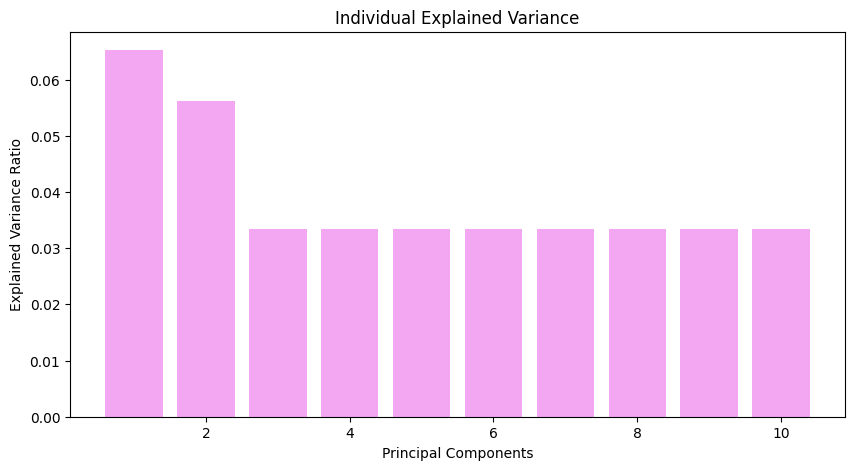

In [99]:
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center', color='violet')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Individual Explained Variance')

plt.show()

Here, we see PC1 and PC2 having high variance, which means it captured much information.

In [100]:
explained_variance = pca.explained_variance_ratio_ * 100
for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var:.2f}% variance explained")

PC1: 6.53% variance explained
PC2: 5.61% variance explained
PC3: 3.33% variance explained
PC4: 3.33% variance explained
PC5: 3.33% variance explained
PC6: 3.33% variance explained
PC7: 3.33% variance explained
PC8: 3.33% variance explained
PC9: 3.33% variance explained
PC10: 3.33% variance explained


The rest (PC3-PC10) have equal variance explained of 3.33%.

## Step 4: Plot the features after doing PCA

In [101]:
PC_df = pd.DataFrame({'PC1': X_principal[:, 0], 'PC2': X_principal[:, 1], 'PC3': X_principal[:, 2],
                      'PC4': X_principal[:, 3], 'PC5': X_principal[:, 4], 'PC6': X_principal[:, 5],
                      'PC7': X_principal[:, 6], 'PC8': X_principal[:, 7], 'PC9': X_principal[:, 8], 'PC10': X_principal[:, 9]})
PC_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.416630,-2.532664,0.610384,0.333856,0.389871,-0.185773,0.789836,0.835010,-0.807475,0.508153
1,-0.393453,-2.077326,0.600515,0.073773,-0.418495,-0.215120,0.656130,-0.793803,0.382103,-0.327869
2,1.868525,-2.533497,-0.055197,1.257310,1.363593,-1.925472,2.081274,-0.695225,-0.058073,-0.967450
3,0.315744,-1.783506,-0.207880,2.792977,-0.519036,-0.547818,-0.210795,0.708673,-0.831208,-1.176140
4,-0.004379,-1.488415,-0.487332,0.070169,0.405306,0.278263,-0.321165,0.823956,-0.833559,-0.265499


In [102]:
PC_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.416630,-2.532664,0.610384,0.333856,0.389871,-0.185773,0.789836,0.835010,-0.807475,0.508153
1,-0.393453,-2.077326,0.600515,0.073773,-0.418495,-0.215120,0.656130,-0.793803,0.382103,-0.327869
2,1.868525,-2.533497,-0.055197,1.257310,1.363593,-1.925472,2.081274,-0.695225,-0.058073,-0.967450
3,0.315744,-1.783506,-0.207880,2.792977,-0.519036,-0.547818,-0.210795,0.708673,-0.831208,-1.176140
4,-0.004379,-1.488415,-0.487332,0.070169,0.405306,0.278263,-0.321165,0.823956,-0.833559,-0.265499
...,...,...,...,...,...,...,...,...,...,...
284802,-1.493200,1.900149,1.856804,-1.297853,0.578455,1.187040,-2.674646,-0.288939,-2.474239,2.119193
284803,-0.366836,0.842366,-0.224483,-0.092465,0.686837,-2.152422,1.601817,0.810996,-0.457186,-0.008930
284804,-0.194063,2.070788,-0.041067,0.307832,0.594699,0.006989,1.139557,-1.633303,1.356697,-0.448978
284805,-0.466089,1.225394,0.023545,0.075627,0.678808,0.860872,0.452327,0.888700,-1.871939,-0.105564


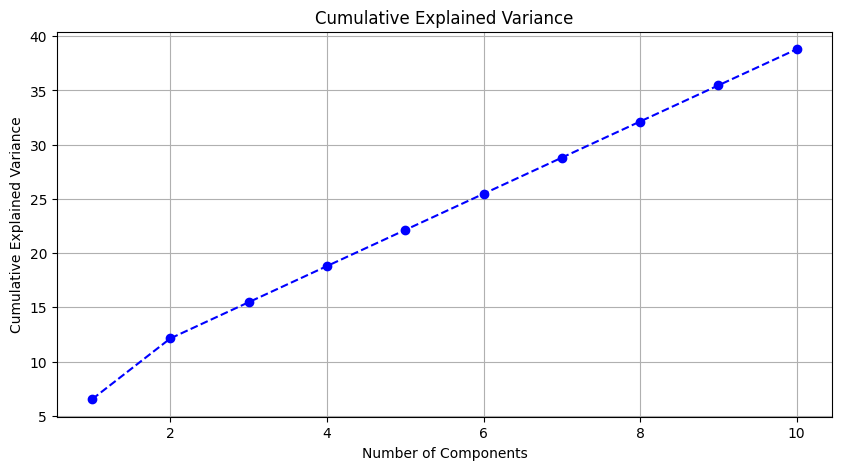

In [103]:
cumulative_explained_variance = np.cumsum(explained_variance)
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', color='blue')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [104]:
PC_df.shape

(284807, 10)

This table shows the dataset after PCA was implemented. Each row represents all 284,806 transactions. Each column represents all 30 features turned into 10 principal components.

Each value is the weighted sum of the original 30 feature values, transformed into the new PCA space. The higher the value, the higher the contribution to PCA.

We can see how much each feature contribute when we implement loadings.

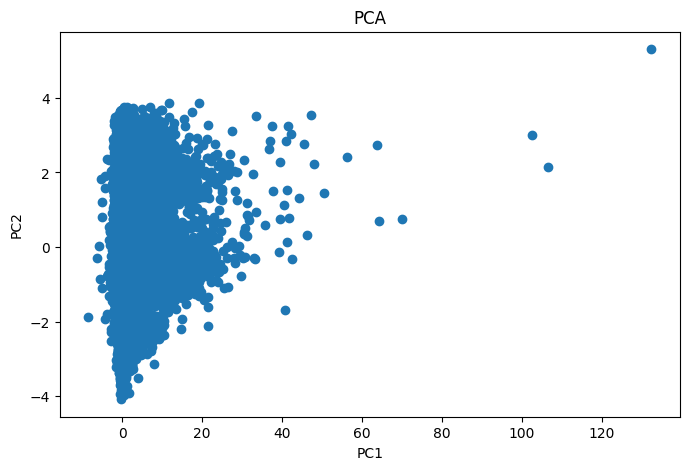

In [105]:
plt.figure(figsize=(8,5))
plt.scatter(PC_df['PC1'], PC_df['PC2'])
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

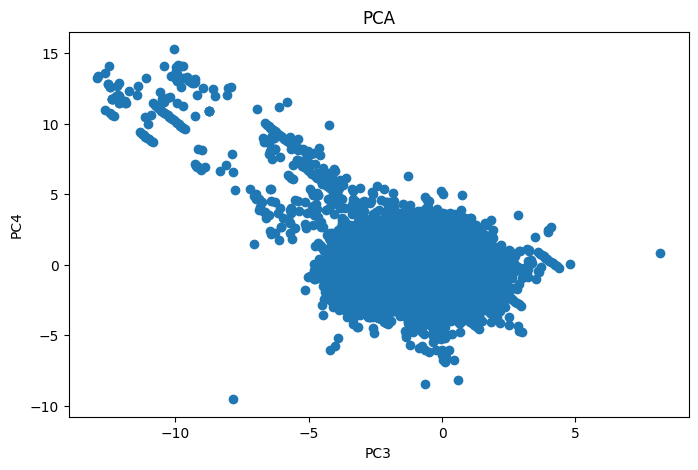

In [106]:
plt.figure(figsize=(8,5))
plt.scatter(PC_df['PC3'], PC_df['PC4'])
plt.title('PCA')
plt.xlabel('PC3')
plt.ylabel('PC4')
plt.show()

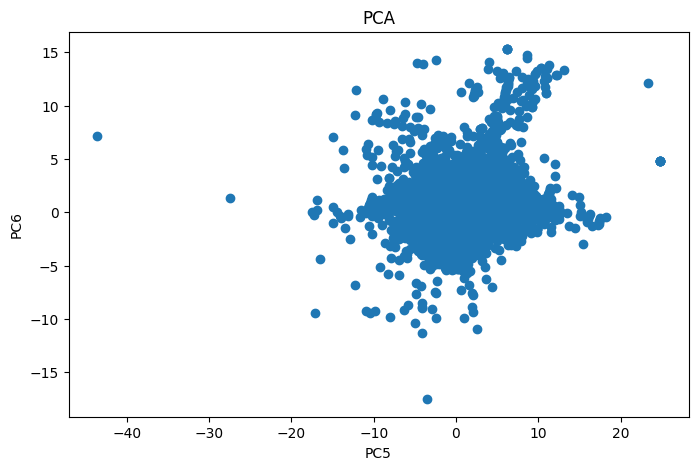

In [107]:
plt.figure(figsize=(8,5))
plt.scatter(PC_df['PC5'], PC_df['PC6'])
plt.title('PCA')
plt.xlabel('PC5')
plt.ylabel('PC6')
plt.show()

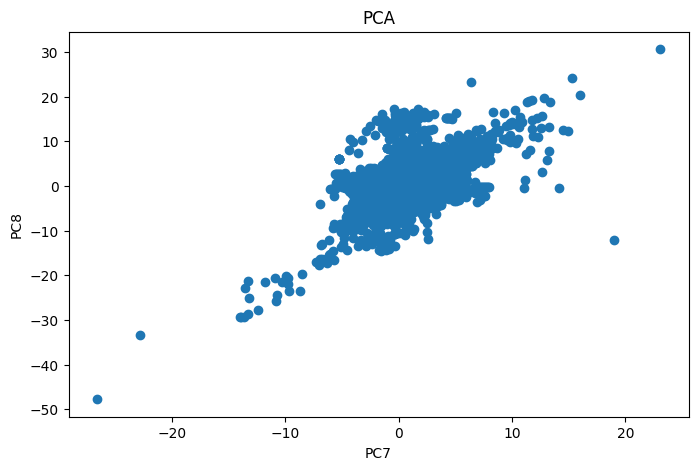

In [108]:
plt.figure(figsize=(8,5))
plt.scatter(PC_df['PC7'], PC_df['PC8'])
plt.title('PCA')
plt.xlabel('PC7')
plt.ylabel('PC8')
plt.show()

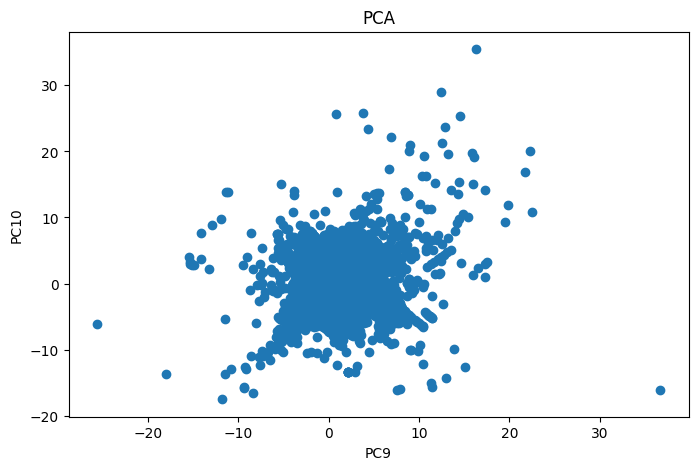

In [109]:
plt.figure(figsize=(8,5))
plt.scatter(PC_df['PC9'], PC_df['PC10'])
plt.title('PCA')
plt.xlabel('PC9')
plt.ylabel('PC10')
plt.show()

## Step 5: Get the loadings

Each feature will get a weight or loading that indicate the how much it contributes to a specific principal component (PC)

In [110]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'], index=feature_names)
loading_matrix

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Time,-0.041487,0.916694,-6.681975e-15,-7.439344e-16,-1.298341e-15,1.387358e-15,0.000000e+00,-1.713402e-15,-0.000000e+00,-0.000000e+00
V1,-0.240066,0.146563,-2.852111e-02,-2.768394e-02,-6.064518e-02,-9.291965e-02,-7.164892e-02,-2.054454e-01,-3.548034e-02,1.322348e-02
V2,-0.547927,-0.039505,-9.694436e-03,9.660790e-02,5.253337e-02,-7.453011e-03,-3.820958e-02,2.073982e-02,-1.227305e-01,5.469549e-02
V3,-0.199450,-0.572663,1.330933e-01,4.174496e-02,-7.062988e-03,-2.394791e-01,-9.935503e-02,2.378927e-01,-1.687161e-01,-1.276967e-01
V4,0.106443,-0.136432,3.784144e-02,5.495074e-02,5.968516e-02,-5.120088e-02,-8.794517e-02,1.848434e-01,-1.322960e-01,2.239411e-01
V5,-0.406192,0.213659,-4.033350e-02,-2.931845e-02,-8.504167e-02,-1.817505e-02,1.386805e-01,-1.901549e-01,1.207127e-01,-8.461030e-02
V6,0.225609,-0.074209,4.239558e-02,7.499975e-03,-3.348581e-02,-1.445801e-01,-1.531072e-02,-1.587670e-02,-5.903053e-02,-3.596892e-01
V7,0.406337,0.132502,-2.126859e-03,-2.066383e-02,-9.798615e-02,-8.240251e-02,4.439388e-02,-2.481725e-01,-2.811302e-02,9.676006e-02
V8,-0.104772,-0.054449,1.865773e-02,3.003415e-02,-7.626203e-03,-4.250462e-02,5.048276e-02,1.130860e-01,3.056231e-02,1.071409e-01
V9,-0.045284,-0.013718,-7.729405e-02,-4.887201e-02,-3.295141e-02,-9.943468e-02,-2.846715e-01,-6.583983e-02,2.695905e-02,4.808584e-01


In [111]:
loadings = pd.DataFrame(
    pca.components_.T * np.sqrt(pca.explained_variance_),
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=feature_names
)
print(loadings['PC1'].sort_values(ascending=False).head(5))


Amount    0.988870
V7        0.406337
V20       0.352449
V6        0.225609
V21       0.107448
Name: PC1, dtype: float64


Here, we can see that the Amount feature contributes 0.988870 to PC1.

In [112]:
loadings = pd.DataFrame(
    pca.components_.T * np.sqrt(pca.explained_variance_),
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=feature_names
)
print(loadings['PC2'].sort_values(ascending=False).head(5))

Time    0.916694
V5      0.213659
V22     0.190068
V12     0.166271
V1      0.146563
Name: PC2, dtype: float64


Here, we can see that the Time feature contributes 0.916694 to PC2.

In [113]:
for i in range(pca.n_components_):
    print(f"Top features for PC{i+1}:")
    print(loadings[f'PC{i+1}'].sort_values(ascending=False).head(5))
    print()

Top features for PC1:
Amount    0.988870
V7        0.406337
V20       0.352449
V6        0.225609
V21       0.107448
Name: PC1, dtype: float64

Top features for PC2:
Time    0.916694
V5      0.213659
V22     0.190068
V12     0.166271
V1      0.146563
Name: PC2, dtype: float64

Top features for PC3:
V12    0.691636
V3     0.133093
V25    0.086103
V15    0.058488
V24    0.051039
Name: PC3, dtype: float64

Top features for PC4:
V18    0.648333
V15    0.163661
V2     0.096608
V4     0.054951
V3     0.041745
Name: PC4, dtype: float64

Top features for PC5:
V21    0.730195
V22    0.450617
V15    0.185336
V24    0.126649
V10    0.122569
Name: PC5, dtype: float64

Top features for PC6:
V25    0.531567
V26    0.434231
V19    0.311257
V24    0.180670
V20    0.053899
Name: PC6, dtype: float64

Top features for PC7:
V15    0.688784
V16    0.187773
V5     0.138681
V10    0.123261
V17    0.060221
Name: PC7, dtype: float64

Top features for PC8:
V27    0.430923
V3     0.237893
V19    0.187828
V4     

## Step 6: Use a clustering algorithm

In [114]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300,
                  n_init = 10, random_state = 0)
kmeans.fit(PC_df)
labels = kmeans.labels_  # Cluster labels for each point
centroids = kmeans.cluster_centers_  # Cluster centroids

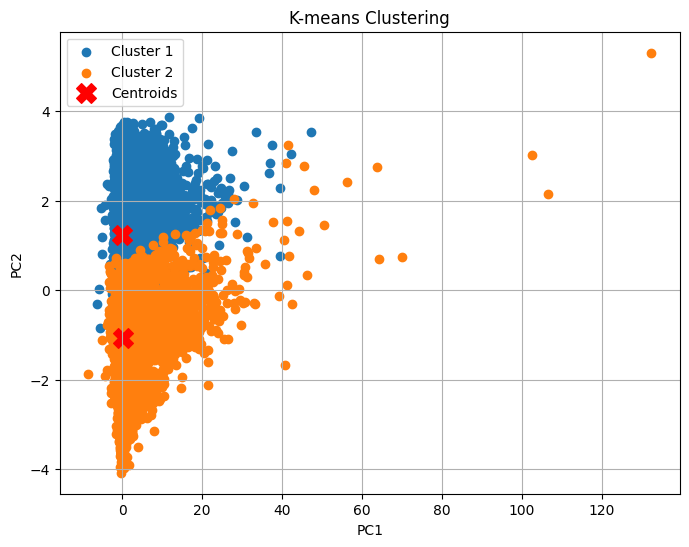

In [115]:
plt.figure(figsize=(8, 6))
for i in range(2):
    cluster_points = X_principal[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                label=f'Cluster {i + 1}')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

Here, we see two clusters formed by PC1 and PC2 through K-Means Clustering Algorithm.

We assume Cluster 1 to depict fraudulent transactions.

We assume Cluster 2 to depict normal transactions, as normal transactions mostly compose the entire dataset.

## Step 7: Outlier Detection using PCA



In [116]:
# Calculate the distance of each point from the centroid of its cluster
distances = np.sqrt(((X_principal - centroids[labels])**2).sum(axis=1))

outlier_threshold = np.percentile(distances, 95)
outliers = distances > outlier_threshold

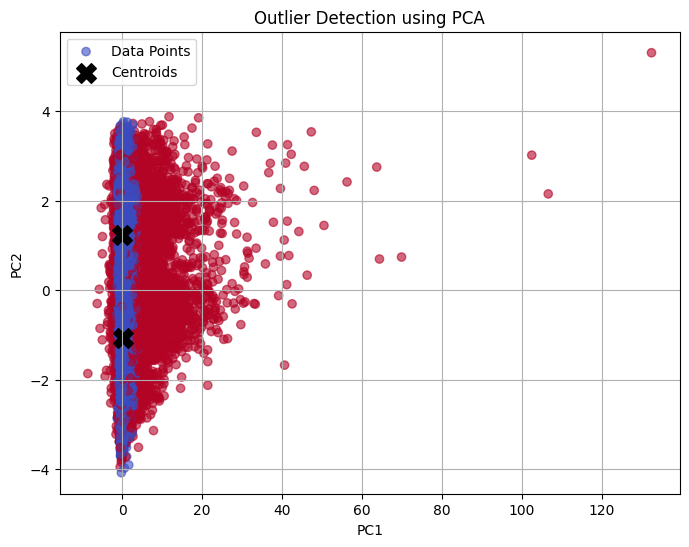

In [117]:
plt.figure(figsize=(8, 6))
plt.scatter(X_principal[:, 0], X_principal[:, 1], c=outliers, cmap='coolwarm', alpha=0.6, label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.title('Outlier Detection using PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)

plt.show()

In [118]:
# Count the number of outliers
print(f"Number of outliers detected: {outliers.sum()}")

Number of outliers detected: 14241


In [119]:
# Analyze outlier class distribution
outlier_indices = np.where(outliers)[0]
outlier_classes = y.iloc[outlier_indices].value_counts()
print("Outlier class distribution:")
print(outlier_classes)

Outlier class distribution:
Class
0    13828
1      413
Name: count, dtype: int64
